In [1]:
#Importing all the Important Libraries that we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA


In [2]:
#importing Dataset
df=pd.read_csv("disney_plus_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [5]:
df.columns.values

array(['show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'], dtype=object)

In [6]:
df.isna().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [7]:
df.describe()

,release_year
count,1368.000000
mean,2002.348684
std,22.127559
min,1928.000000
25%,1998.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [8]:
year_counts = df['release_year'].value_counts().sort_index()

In [9]:
year_counts

1928      1
1932      3
1933      3
1934      4
1935      4
       ... 
2017     67
2018     65
2019     97
2020    109
2021     82
Name: release_year, Length: 90, dtype: int64

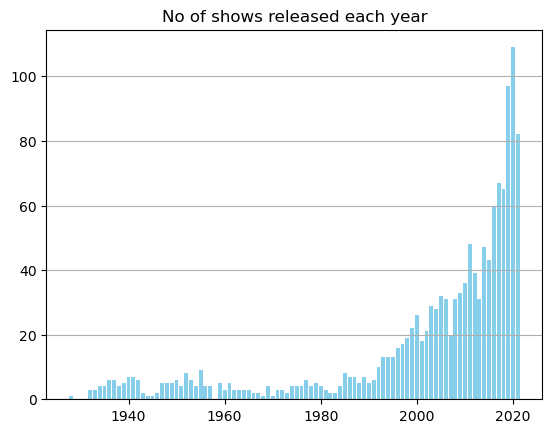

In [10]:
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel='No. of shows released'
plt.ylabel='Year of released'
plt.title('No of shows released each year')
plt.grid(True, axis='y')
plt.show()

In [11]:
df['release_year'] = pd.to_datetime(df['release_year'],format='%Y', errors='coerce')

In [12]:
df=df.dropna(subset=['release_year'])

In [13]:
release_per_year = df['release_year'].dt.year.value_counts().sort_index()

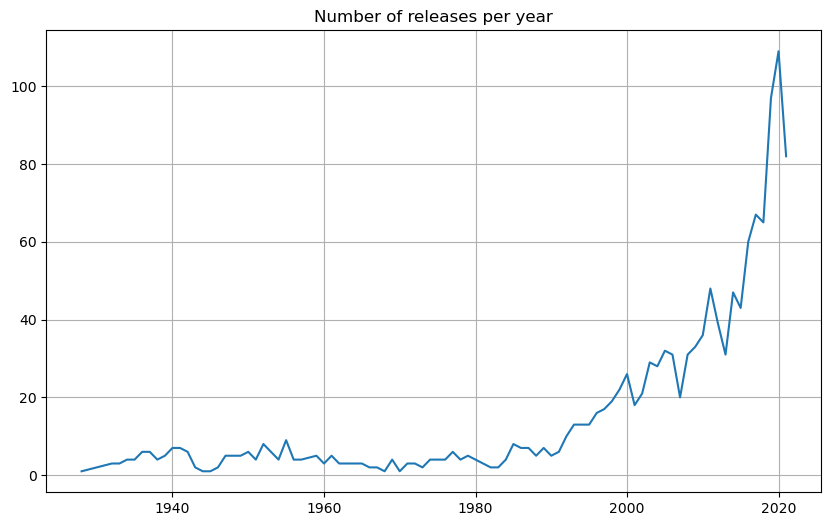

In [14]:
plt.figure(figsize=(10,6))
release_per_year.plot(kind='line')
plt.xlabel="Year"
plt.ylabel='Number of Releases'
plt.title('Number of releases per year')
plt.grid(True)
plt.show()


In [15]:
df['description']= df['description'].astype(str)

In [16]:
vectorizer = TfidfVectorizer(stop_words='english')
X= vectorizer.fit_transform(df['description'])

In [17]:
kmeans = KMeans(n_clusters = 5,random_state=42)
df['cluster'] = kmeans.fit_predict(X)

In [18]:
pca = PCA(n_components=2, random_state=42)

In [19]:
X_pca = pca.fit_transform(X.toarray())

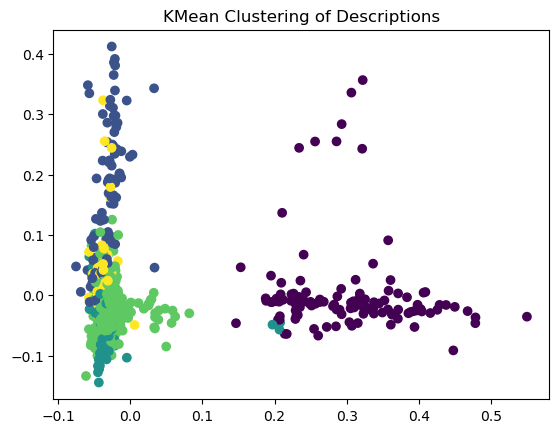

In [20]:
plt.scatter(X_pca[:,0],X_pca[:,1], c=df['cluster'],cmap='viridis')
plt.title('KMean Clustering of Descriptions')
plt.xlabel='PCA Component 1'
plt.ylabel='PCA Component 2'
plt.show()

In [21]:
df['release_year'] = df['release_year'].dt.year

In [22]:
selected_feature = ['release_year','rating','cluster']

In [23]:
data_selected = df[selected_feature].dropna()

In [24]:
data_selected['rating']= data_selected['rating'].astype('category').cat.codes

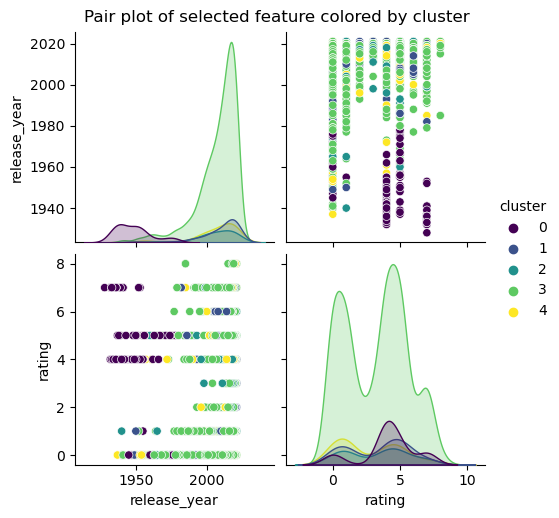

In [25]:
sns.pairplot(data_selected, hue='cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Pair plot of selected feature colored by cluster', y=1.02)
plt.show()